# Unsupervised Clustering Model - Car Data Clustering

### data

In [252]:
import pandas as pd
import numpy as np
from sklearn import cluster

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [253]:
data=pd.read_csv("car.csv")
data.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [255]:
data.duplicated().value_counts()

False    299
True       2
dtype: int64

In [256]:
data=data.drop_duplicates()

In [257]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Finding Outliers

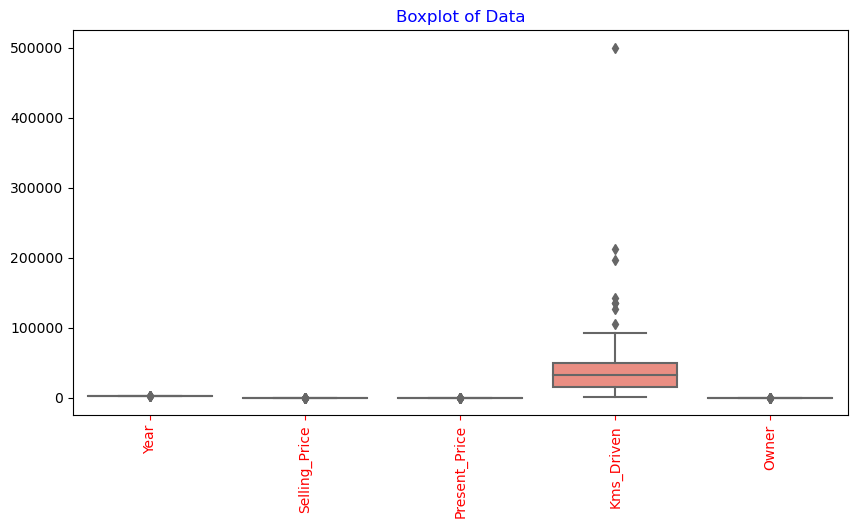

In [258]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data, ax=ax, palette='Set3')
ax.set_title('Boxplot of Data', color='blue',)
ax.tick_params(axis='x', labelrotation=90, colors='red')
plt.show()

In [259]:
import warnings
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(dataframe, feature):
    warnings.filterwarnings("ignore")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    sns.boxplot(dataframe[feature], saturation=5.0, width=.25, ax=ax1)
    ax1.set_title('Box Plot of Data',color='blue',)
    ax1.set_xlabel(feature ,color='red')

    sns.distplot(dataframe[feature], kde=True, rug=True, color='blue',
                 kde_kws={"color": "red", "lw": 2, "alpha": 0.7},
                 hist_kws={"linewidth":.5, "alpha": 0.25}, ax=ax2)
    ax2.set_title('Distribution Plot of Data',color='blue',)
    ax2.set_xlabel(feature ,color='red')
    plt.show()

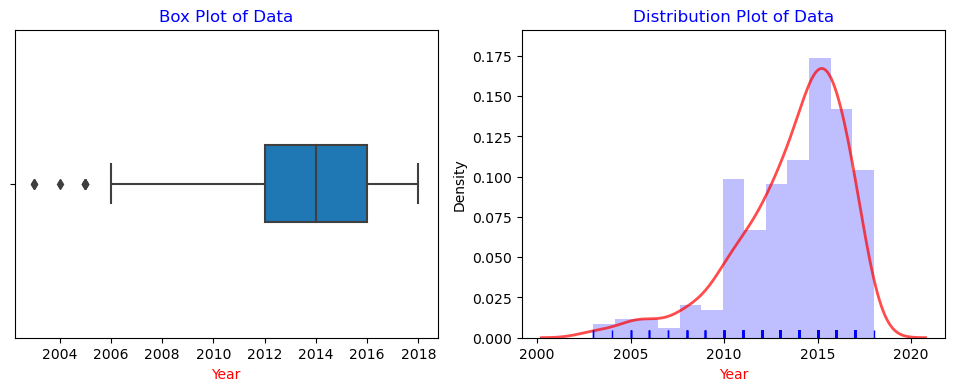

In [260]:
plot_data(data,"Year")

In [261]:
Q1 = data["Year"].quantile(0.25)
Q3 = data["Year"].quantile(0.75)
IQR = Q3 - Q1
year_data=data[(data["Year"] >= Q1 - 1.5*IQR) & (data["Year"] <= Q3 + 1.5*IQR)]
newdata = data.merge(year_data)
#newdata = pd.merge(data, year_data)
print(len(data))
print(len(year_data))
print(len(newdata))


299
292
292


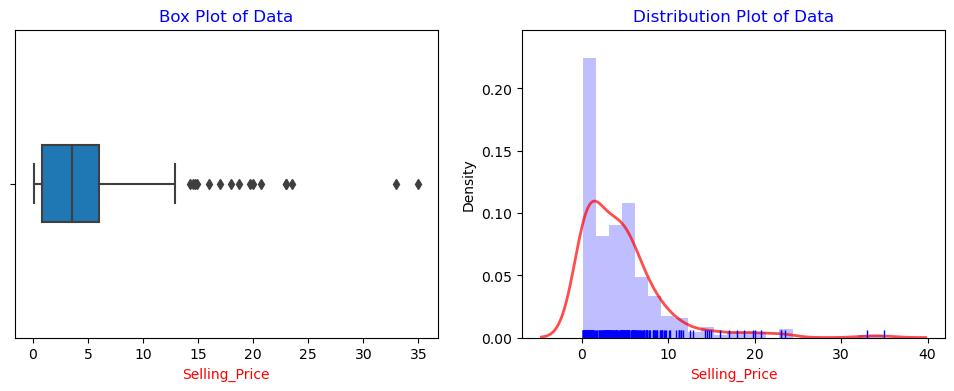

In [262]:
plot_data(data,"Selling_Price")

In [263]:
Q1 = data["Selling_Price"].quantile(0.25)
Q3 = data["Selling_Price"].quantile(0.75)
IQR = Q3 - Q1
sell_data=data[(data["Selling_Price"] >= Q1 - 3*IQR) & (data["Selling_Price"] <= Q3 + 1.5*IQR)]
newdata = newdata.merge(sell_data)
print(len(newdata))


276


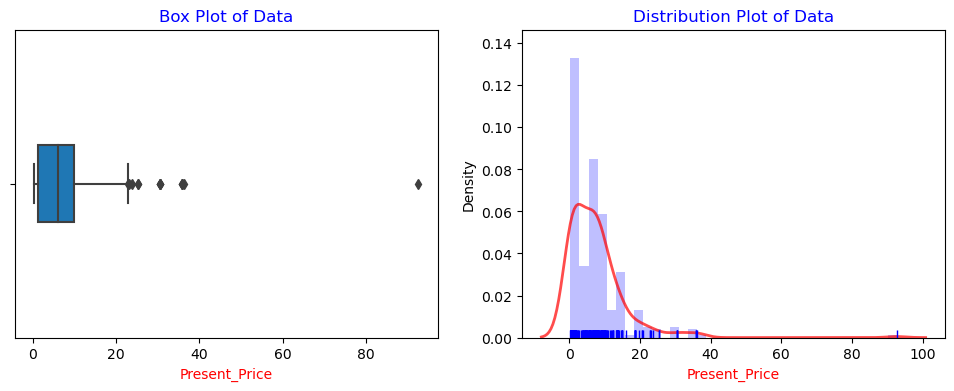

In [264]:
plot_data(data,"Present_Price")

In [265]:
Q1 = data["Present_Price"].quantile(0.25)
Q3 = data["Present_Price"].quantile(0.75)
IQR = Q3 - Q1
precent_data=data[(data["Present_Price"] >= Q1 - 3*IQR) & (data["Present_Price"] <= Q3 + 1.5*IQR)]
newdata = newdata.merge(precent_data)
print(len(newdata))

274


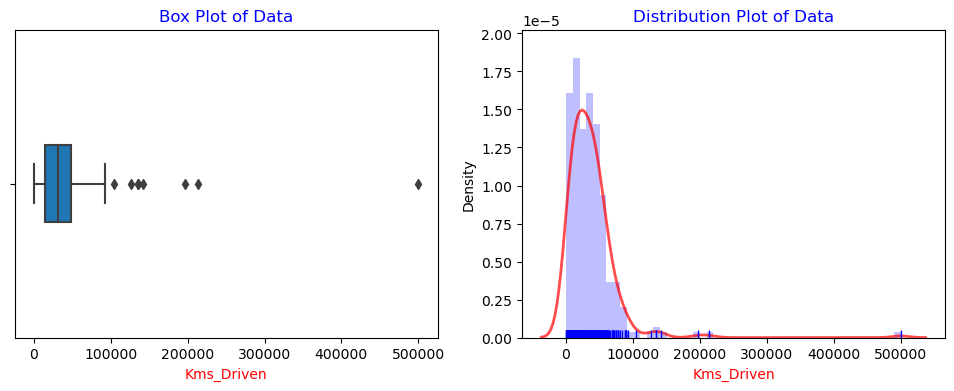

In [266]:
plot_data(data,"Kms_Driven")

In [267]:
Q1 = data["Kms_Driven"].quantile(0.25)
Q3 = data["Kms_Driven"].quantile(0.75)
IQR = Q3 - Q1
driven_data=data[(data["Kms_Driven"] >= Q1 - 3*IQR) & (data["Kms_Driven"] <= Q3 + 1.5*IQR)]
newdata = newdata.merge(driven_data)
print(len(newdata))

272


In [268]:
newdata.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [269]:
newdata["car_value_percentage"]=(newdata["Selling_Price"]/newdata["Present_Price"])*100
newdata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_value_percentage
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,59.928444
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,49.790356
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,73.604061
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,68.674699
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,66.957787


In [270]:
newdata.drop("Car_Name",axis=1,inplace=True)

In [271]:
data["Fuel_Type"].value_counts() 

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [272]:
data["Seller_Type"].value_counts() 

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [273]:
data["Transmission"].value_counts() 

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [274]:
data["Owner"].value_counts() 

0    288
1     10
3      1
Name: Owner, dtype: int64

### Data Transformation

In [275]:
one_hot_encoded = pd.get_dummies(newdata[['Fuel_Type',"Seller_Type","Transmission"]], drop_first=True)

In [276]:
newdata.drop(['Fuel_Type',"Seller_Type","Transmission"],axis=1,inplace=True)

In [277]:
newdata = pd.concat([newdata, one_hot_encoded], axis=1)
newdata .head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,car_value_percentage,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,59.928444,0,1,0,1
1,2013,4.75,9.54,43000,0,49.790356,1,0,0,1
2,2017,7.25,9.85,6900,0,73.604061,0,1,0,1


In [278]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdata['Year'] = le.fit_transform(newdata['Year'])
newdata.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,car_value_percentage,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8,3.35,5.59,27000,0,59.928444,0,1,0,1
1,7,4.75,9.54,43000,0,49.790356,1,0,0,1


In [279]:
newdata.isnull().sum()

Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
car_value_percentage      0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [280]:
x=newdata[["Year","car_value_percentage"]]
x

,Year,car_value_percentage
0,8,59.928444
1,7,49.790356
2,11,73.604061
3,5,68.674699
4,8,66.957787
...,...,...
267,10,81.896552
268,9,67.796610
269,3,30.454545
270,11,92.000000


## K-Nearest Neighbors (KNN) 

In [281]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(newdata[['Year','car_value_percentage']])
y_predicted

array([0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1,
       1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       1, 0, 0, 2, 0, 1, 2, 2])

In [282]:
km.cluster_centers_

array([[ 7.88983051, 61.90367952],
       [ 4.5       , 36.99874322],
       [ 9.84375   , 84.39677008]])

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

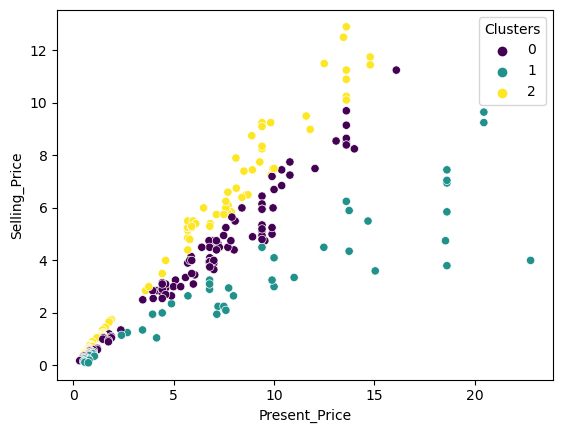

In [283]:
newdata['Clusters'] = km.labels_
sns.scatterplot(x="Present_Price", y="Selling_Price",hue = 'Clusters',  data=newdata,palette='viridis')

### Finding Optimum of K

#### The Elbow Method 

In [288]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(newdata)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

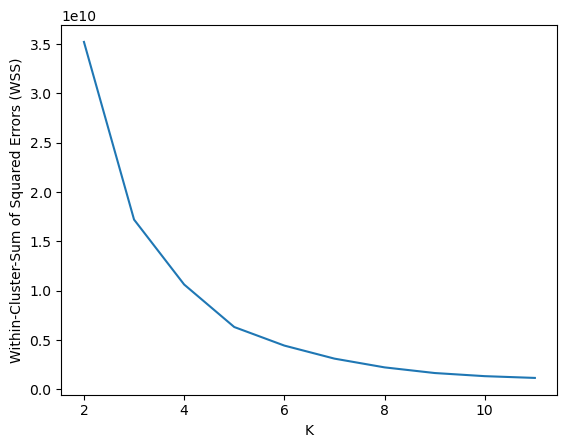

In [289]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [292]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(newdata).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
+str(metrics.silhouette_score(newdata,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5972080802922202
Silhouette score for k(clusters) = 3 is 0.578446290465298
Silhouette score for k(clusters) = 4 is 0.5393920999918912
Silhouette score for k(clusters) = 5 is 0.5529346790432411
Silhouette score for k(clusters) = 6 is 0.5575086507573654
Silhouette score for k(clusters) = 7 is 0.5755253312729759
Silhouette score for k(clusters) = 8 is 0.5829071378157051
Silhouette score for k(clusters) = 9 is 0.5957864277534631
Silhouette score for k(clusters) = 10 is 0.5769545193209115
Silhouette score for k(clusters) = 11 is 0.5801176376408894
Silhouette score for k(clusters) = 12 is 0.5679969612701627


In [293]:
newdata.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,car_value_percentage,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Clusters
0,8,3.35,5.59,27000,0,59.928444,0,1,0,1,0
1,7,4.75,9.54,43000,0,49.790356,1,0,0,1,0
2,11,7.25,9.85,6900,0,73.604061,0,1,0,1,2
3,5,2.85,4.15,5200,0,68.674699,0,1,0,1,0
4,8,4.60,6.87,42450,0,66.957787,1,0,0,1,0


#### Principal Component Analysis (PCA)

In [301]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(newdata)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,-0.001230,0.059907
1,0.214879,-0.007711
2,-0.361209,0.085430
3,-0.054459,0.313254
4,0.039422,-0.113665


In [302]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

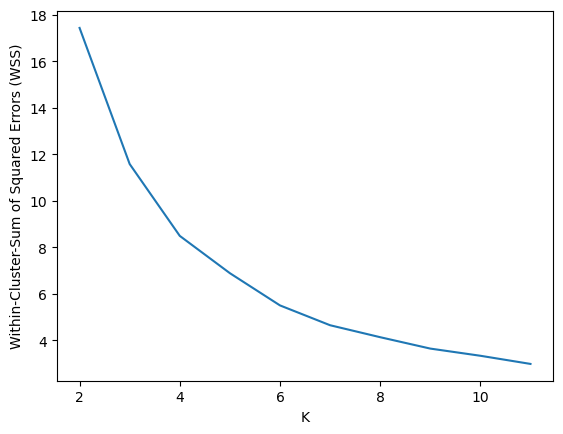

In [303]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [304]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.4415469630322215
Silhouette score for k(clusters) = 3 is 0.38862716410910686
Silhouette score for k(clusters) = 4 is 0.417423513280942
Silhouette score for k(clusters) = 5 is 0.4120595690659225
Silhouette score for k(clusters) = 6 is 0.3898323408064169
Silhouette score for k(clusters) = 7 is 0.38670074454227493
Silhouette score for k(clusters) = 8 is 0.3734841262627971
Silhouette score for k(clusters) = 9 is 0.3869584431986553
Silhouette score for k(clusters) = 10 is 0.3826400744102444
Silhouette score for k(clusters) = 11 is 0.3937991254311792


In [306]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(pca_df)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

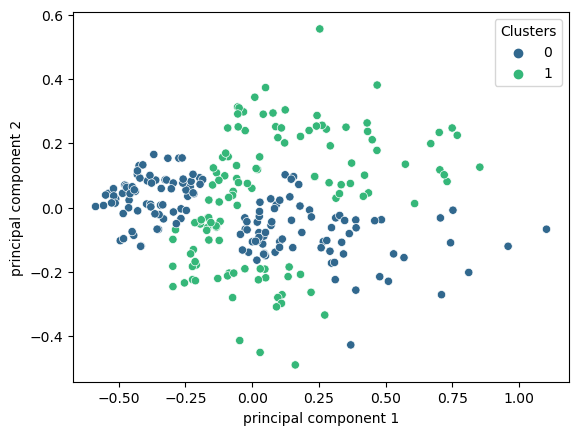

In [307]:
pca_df['Clusters'] = kmeans.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [308]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler


In [309]:
pca_df.head()

,principal component 1,principal component 2,Clusters
0,-0.001230,0.059907,1
1,0.214879,-0.007711,0
2,-0.361209,0.085430,0
3,-0.054459,0.313254,1
4,0.039422,-0.113665,0


Estimated no. of clusters: 2
Estimated no. of noise points: 0
v_measure = 0.218359536728161


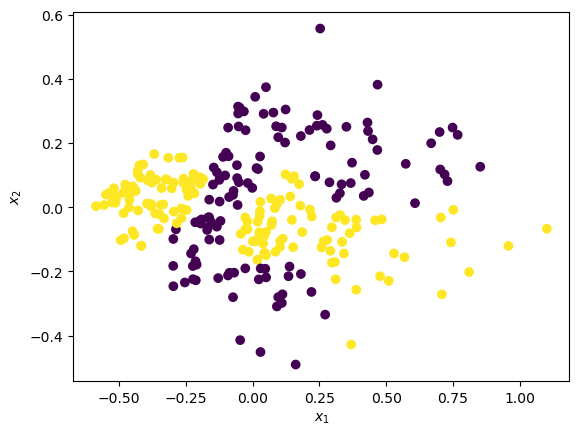

In [311]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(pca_df)
x=pca_df["principal component 1"].values
y=pca_df["principal component 2"].values
# Visualizing DBSCAN
plt.scatter(x, 
            y, 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 5
Estimated no. of noise points: 35
v_measure = 0.4384132290725339


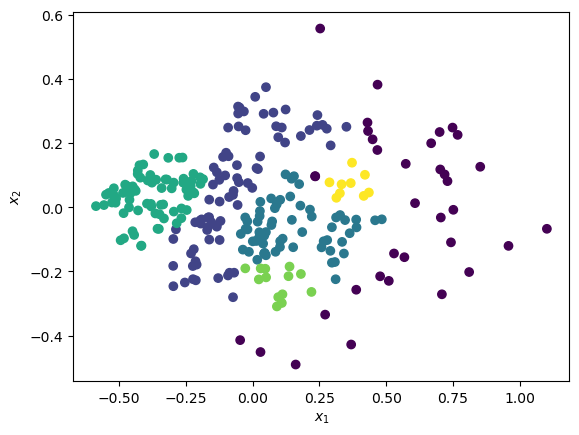

In [313]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(pca_df)

# Visualizing DBSCAN
plt.scatter(x, 
y, 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Text(0, 0.5, 'Distance')

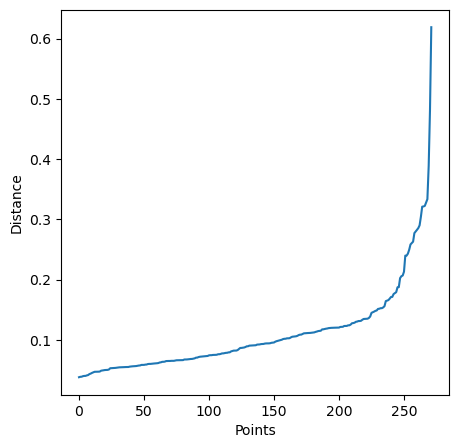

In [314]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(pca_df)

distances, indices = neighbors.kneighbors(pca_df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [315]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


0.1518305563743368


<Figure size 500x500 with 0 Axes>

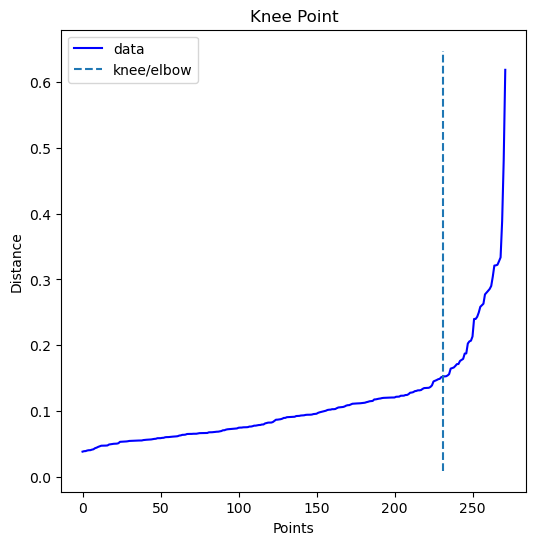

In [316]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Estimated no. of clusters: 4
Estimated no. of noise points: 16
v_measure = 0.3868273729112762


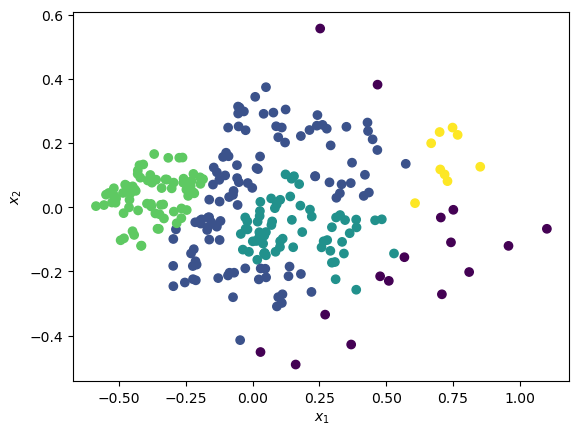

In [319]:
dbscan_cluster = DBSCAN(eps=0.151, min_samples=10)
dbscan_cluster.fit(pca_df)

# Visualizing DBSCAN
plt.scatter(x, 
y, 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))